#Customer Segmantation
1. Using PCA we reduce products dimension (134 aisle section to 6)
2. Visualzating user shoppings in those 6 aisles (we will find out distinguable clusters) 
3. Choose clustering components based on which tuple of PCAs create more obvious clusters with each other
4. Clustering those components using 4 clusters.

In [1]:
import os

In [2]:
os.environ['KAGGLE_USERNAME'] = "rojinakashefi"
os.environ['KAGGLE_KEY'] = 'b5d040897af418522b930aa451dc2428'

In [3]:
!kaggle competitions download -c instacart-market-basket-analysis

 94% 185M/196M [00:01<00:00, 162MB/s]
100% 196M/196M [00:01<00:00, 151MB/s]


In [4]:
!unzip instacart-market-basket-analysis
!unzip aisles.csv
!unzip departments.csv
!unzip order_products__prior.csv
!unzip order_products__train.csv
!unzip orders.csv
!unzip products.csv
!unzip sample_submission.csv

Archive:  instacart-market-basket-analysis.zip
  inflating: aisles.csv.zip          
  inflating: departments.csv.zip     
  inflating: order_products__prior.csv.zip  
  inflating: order_products__train.csv.zip  
  inflating: orders.csv.zip          
  inflating: products.csv.zip        
  inflating: sample_submission.csv.zip  
Archive:  aisles.csv.zip
  inflating: aisles.csv              
   creating: __MACOSX/
  inflating: __MACOSX/._aisles.csv   
Archive:  departments.csv.zip
  inflating: departments.csv         
  inflating: __MACOSX/._departments.csv  
Archive:  order_products__prior.csv.zip
  inflating: order_products__prior.csv  
  inflating: __MACOSX/._order_products__prior.csv  
Archive:  order_products__train.csv.zip
  inflating: order_products__train.csv  
  inflating: __MACOSX/._order_products__train.csv  
Archive:  orders.csv.zip
  inflating: orders.csv              
  inflating: __MACOSX/._orders.csv   
Archive:  products.csv.zip
  inflating: products.csv            
  in

### Preprocessing

In [5]:
import pandas as pd

In [6]:
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
prior = pd.read_csv('order_products__prior.csv')
train = pd.read_csv('order_products__train.csv')
departments = pd.read_csv('departments.csv')
aisles = pd.read_csv('aisles.csv')
submission = pd.read_csv('sample_submission.csv')

In [7]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
prior.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
train.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [10]:
orders_prior = pd.merge(orders,prior,on=['order_id'])

In [11]:
orders_prior.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [12]:
orders_prior.sort_values(by=['user_id','order_id'])

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
21,431534,1,prior,5,4,15,28.0,196,1,1
22,431534,1,prior,5,4,15,28.0,12427,2,1
23,431534,1,prior,5,4,15,28.0,10258,3,1
24,431534,1,prior,5,4,15,28.0,25133,4,1
25,431534,1,prior,5,4,15,28.0,10326,5,0
...,...,...,...,...,...,...,...,...,...,...
32434370,3154581,206209,prior,1,3,11,NaN,20842,11,0
32434371,3154581,206209,prior,1,3,11,NaN,23594,12,0
32434372,3154581,206209,prior,1,3,11,NaN,25837,13,0
32434416,3186442,206209,prior,6,0,16,3.0,14197,1,0


In [13]:
products.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [14]:
aisles.head(5)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [18]:
product_prior = pd.merge(products,prior, on = ['product_id','product_id'])
product_prior_aisle = pd.merge(product_prior,aisles,on = ['aisle_id','aisle_id'])
product_prior_aisle_order = pd.merge(product_prior_aisle,orders,on = ['order_id','order_id'])

In [28]:
product_prior_aisle_order.head(5)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,1107,7,0,cookies cakes,38259,prior,2,1,11,7.0
1,9007,Frosted Flakes,121,14,1107,17,0,cereal,38259,prior,2,1,11,7.0
2,32689,Romaine Hearts,123,4,1107,16,0,packaged vegetables fruits,38259,prior,2,1,11,7.0
3,28413,Bunny-Luv Organic Carrots,83,4,1107,13,0,fresh vegetables,38259,prior,2,1,11,7.0
4,46149,Zero Calorie Cola,77,7,1107,6,0,soft drinks,38259,prior,2,1,11,7.0


In [30]:
merge_table = product_prior_aisle_order

In [31]:
print(len(merge_table['aisle'].unique()))
print('-----')
print(merge_table['aisle'].value_counts())

134
-----
fresh fruits                  3642188
fresh vegetables              3418021
packaged vegetables fruits    1765313
yogurt                        1452343
packaged cheese                979763
                               ...   
eye ear care                     8974
baby bath body care              8581
baby accessories                 8160
beauty                           6168
frozen juice                     4853
Name: aisle, Length: 134, dtype: int64


In [33]:
crosstab_table = pd.crosstab(merge_table['user_id'],merge_table['aisle'])
crosstab_table.head(5)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [39]:
crosstab_table.shape

(206209, 134)

### PCA

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

([<matplotlib.axis.XTick at 0x7f801bae4f10>,
 <a list of 20 Text major ticklabel objects>)

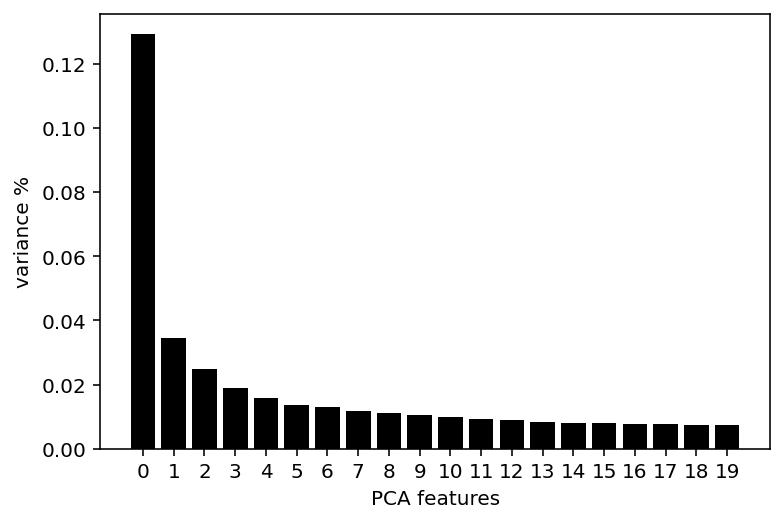

In [64]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(crosstab_table)
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [54]:
pca = PCA(n_components=6)
sample_pca = pca.fit_transform(crosstab_table)

In [55]:
reduced_ct = pd.DataFrame(sample_pca)
reduced_ct.shape

(206209, 6)

In [110]:
reduced_ct

,0,1,2,3,4,5
0,-24.215659,2.429427,-2.466377,-0.145668,0.269978,-1.432668
1,6.463208,36.751116,8.382554,15.097538,-6.921124,-0.978229
2,-7.990302,2.404382,-11.030069,0.672253,-0.442331,-2.822173
3,-27.991129,-0.755823,-1.921732,2.091890,-0.288248,0.926269
4,-19.896394,-2.637225,0.533228,3.679232,0.612822,-1.623740
...,...,...,...,...,...,...
206204,-24.200168,1.369802,1.325348,4.935905,0.318231,0.005042
206205,-4.837135,-0.152500,5.263282,-21.059448,0.727600,-13.415589
206206,8.611433,7.701299,7.952403,-5.906248,1.718682,-3.267182
206207,84.086220,20.418735,8.054124,-15.558608,9.032596,-37.419223


Plot different principle components with each other

In [ ]:
for i in range(6):
  for j in range(6):
    plt.figure
    plt.scatter(reduced_ct[i],reduced_ct[j],alpha=.1)
    plt.xlabel(f'pca {(i+1)}' )
    plt.ylabel(f'pca {(j+1)}')
    plt.show()

### K-means

In [94]:
from sklearn.cluster import KMeans

In [95]:
to_cluster = pd.DataFrame(reduced_ct[[4,1]])

In [101]:
to_cluster

,4,1
0,0.269978,2.429427
1,-6.921124,36.751116
2,-0.442331,2.404382
3,-0.288248,-0.755823
4,0.612822,-2.637225
...,...,...
206204,0.318231,1.369802
206205,0.727600,-0.152500
206206,1.718682,7.701299
206207,9.032596,20.418735


In [99]:
cluster_ = KMeans(n_clusters=4, random_state=42).fit(to_cluster)
c_preds = cluster_.predict(to_cluster)

In [100]:
centers_ = cluster_.cluster_centers_

In [102]:
centers_

array([[ -0.11846099,   0.10233217],
       [-11.29424353,  65.33406501],
       [ -4.70804926, -40.58312236],
       [ 76.82339852,  26.26358546]])

In [109]:
print(c_preds[-100:])

[0 0 0 0 0 0 0 1 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 3 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


['orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']


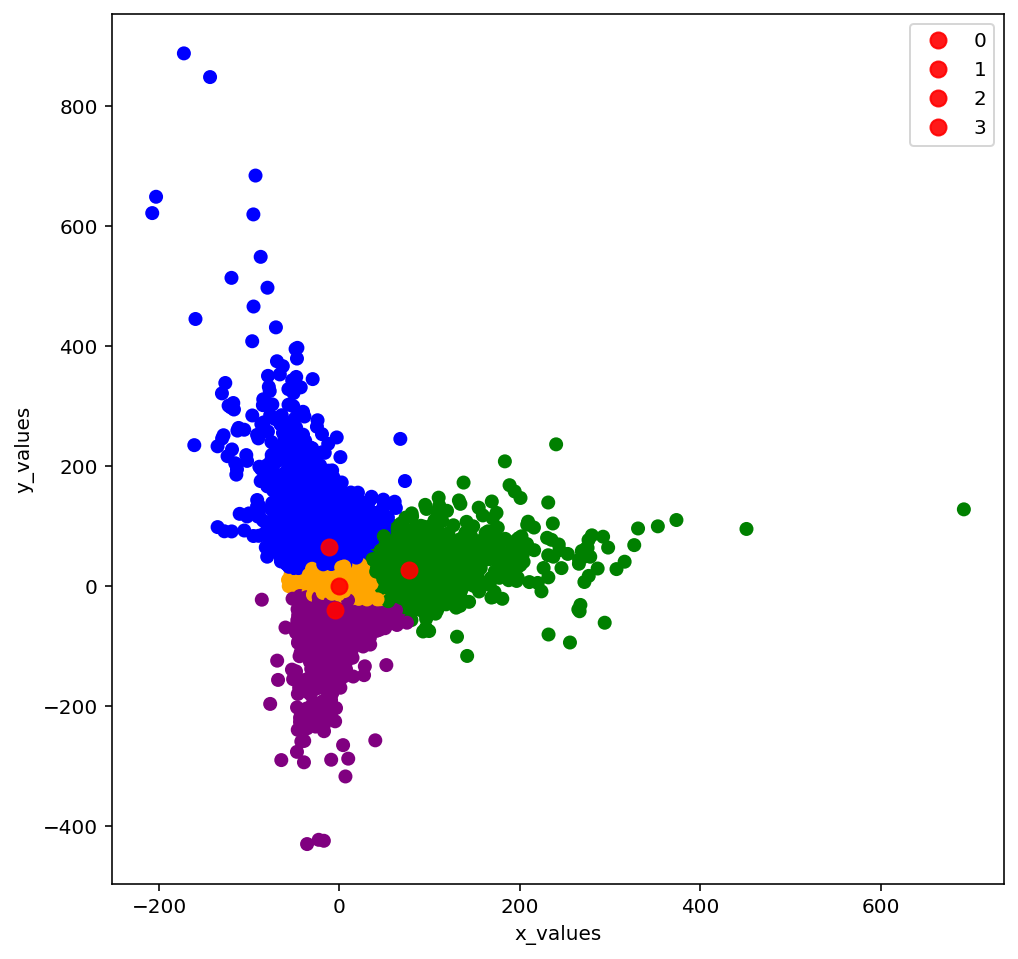

In [103]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
plt.scatter(to_cluster[4],to_cluster[1],  color = colored)
for ci,c in enumerate(centers_):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()